# OpenCV 이미지 연산 실습 - Colab 노트북

OpenCV를 활용하여 다음과 같은 실습과 과제를 수행합니다.
1. 이미지 크기 및 픽셀 정보 확인
2. 특정 범위 픽셀 변경(반복문 vs 슬라이싱)
3. ROI(Region of Interest) 추출 및 복사
4. 픽셀별 색상 채널 다루기
5. 추가 실습(과제) 해결 코드

추가로, 각 코드 셀에는 OpenCV 함수별 설명 및 관련 이론이 간단히 포함되어 있으며, 최종적으로는 Colab에서 정상적으로 동작하도록 구성했습니다.

> **중요**: Colab 환경에서는 `cv2.imshow()` 대신 `cv2_imshow()`를 사용해야 이미지를 표시할 수 있습니다.

## 1. 환경 설정 및 라이브러리 불러오기
Colab에서 OpenCV가 미설치된 경우를 대비해 설치 명령어를 먼저 실행한 뒤, 필요한 라이브러리를 임포트합니다.

In [1]:
!pip install opencv-python-headless

In [2]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow
import time

## 2. 이미지 업로드 및 정보 확인
Colab에 이미지를 업로드하고, 이미지의 기초 정보를 확인해 보겠습니다.

1. **`cv2.imread()`**: 이미지를 디스크에서 읽어들여 OpenCV의 `numpy` 배열 형태로 로드합니다.
   - 파라미터로 파일 이름과 읽기 옵션(`cv2.IMREAD_COLOR`, `cv2.IMREAD_GRAYSCALE` 등)을 지정할 수 있습니다.
2. **`image.shape`**: (Height, Width, Channels)를 의미합니다.
3. **`image.size`**: 전체 픽셀 수(Height × Width × Channels)를 의미합니다.
4. **`image[y, x]`**: (y, x) 위치의 픽셀(BGR) 정보를 배열 형태로 얻을 수 있습니다.
   - OpenCV는 **BGR(Blue, Green, Red)** 순서를 기본으로 합니다.
   - 즉, `image[y, x][0]` = Blue, `image[y, x][1]` = Green, `image[y, x][2]` = Red.

In [3]:
# Colab에 이미지 업로드
uploaded = files.upload()

# 업로드된 첫 번째 이미지 파일 이름 가져오기
filename = list(uploaded.keys())[0]

# 이미지를 BGR 컬러로 읽기
image = cv2.imread(filename, cv2.IMREAD_COLOR)
print("이미지 로드 완료! 파일명:", filename)

# 이미지 기본 정보 확인
print("이미지 크기 (Height, Width, Channels):", image.shape)
print("이미지 전체 픽셀 수:", image.size)

# 특정 픽셀의 BGR 값 확인
y, x = 100, 100  # 예: (100, 100) 위치
if y < image.shape[0] and x < image.shape[1]:
    px = image[y, x]
    print(f"({y}, {x}) 위치 픽셀의 BGR 값:", px)
    print(f"({y}, {x}) 위치 픽셀의 B 값:", px[0])
    print(f"({y}, {x}) 위치 픽셀의 G 값:", px[1])
    print(f"({y}, {x}) 위치 픽셀의 R 값:", px[2])
else:
    print(f"이미지 크기가 100×100보다 작아서, ({y}, {x}) 픽셀이 존재하지 않습니다.")

Saving mine2.jpg to mine2.jpg
이미지 로드 완료! 파일명: mine2.jpg
이미지 크기 (Height, Width, Channels): (300, 400, 3)
이미지 전체 픽셀 수: 360000
(100, 100) 위치 픽셀의 BGR 값: [74 81 96]
(100, 100) 위치 픽셀의 B 값: 74
(100, 100) 위치 픽셀의 G 값: 81
(100, 100) 위치 픽셀의 R 값: 96


## 3. 특정 범위 픽셀 변경
OpenCV의 이미지 객체는 **numpy 배열**과 호환되므로, 2차원(또는 3차원) 슬라이싱을 통해 손쉽게 특정 영역을 변경할 수 있습니다.
또한, 반복문을 사용해 픽셀을 하나씩 변경하는 방법과 슬라이싱을 사용해 한 번에 처리하는 방법을 비교해볼 수 있습니다.

### 3.1 반복문 vs 슬라이싱
- **반복문 방식**: `for i in range(...): for j in range(...): ...`
  - 각 픽셀에 직접 접근하여 값을 대입하는 방식입니다.
  - 이미지 크기가 커질수록 상대적으로 느려집니다.
- **슬라이싱 방식**: `image[y1:y2, x1:x2] = [B, G, R]`
  - 범위를 지정해 한 번에 값을 대입하는 방식입니다.
  - 반복문을 사용하지 않으므로 훨씬 빠르게 동작합니다.

--- 반복문 방식 수행 시간: 0.005777 seconds ---
--- 슬라이싱 방식 수행 시간: 0.000255 seconds ---

[반복문 방식] 상단 100×100 영역을 흰색으로 변경


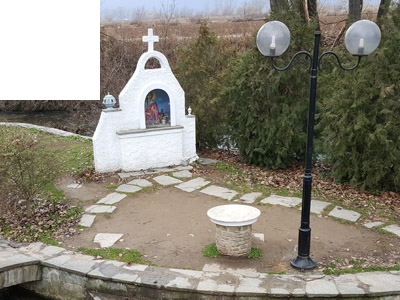


[슬라이싱 방식] 상단 100×100 영역을 검정색으로 변경


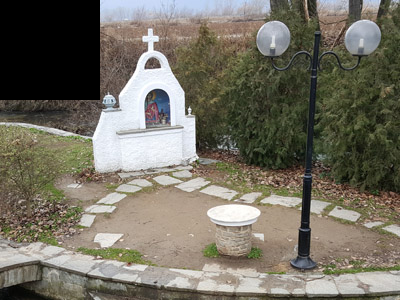

In [4]:
# 이미지 복사본 생성
image_copy = image.copy()

# (1) 반복문을 이용한 특정 범위 변경
start_time = time.time()
rows = min(100, image_copy.shape[0])  # 이미지가 100보다 작을 수 있으므로
cols = min(100, image_copy.shape[1])
for i in range(rows):
    for j in range(cols):
        image_copy[i, j] = [255, 255, 255]  # 흰색으로 변경
end_time = time.time()
print("--- 반복문 방식 수행 시간: %.6f seconds ---" % (end_time - start_time))

# (2) 슬라이싱을 이용한 특정 범위 변경
image_copy2 = image.copy()
start_time = time.time()
image_copy2[0:rows, 0:cols] = [0, 0, 0]  # 검정색으로 변경
end_time = time.time()
print("--- 슬라이싱 방식 수행 시간: %.6f seconds ---" % (end_time - start_time))

# 결과 이미지 보기
print("\n[반복문 방식] 상단 100×100 영역을 흰색으로 변경")
cv2_imshow(image_copy)

print("\n[슬라이싱 방식] 상단 100×100 영역을 검정색으로 변경")
cv2_imshow(image_copy2)

## 4. ROI(Region of Interest) 추출 및 복사
이미지에서 특정 영역(ROI)을 잘라내어(`numpy` 슬라이싱 활용) 다른 위치에 복사할 수 있습니다. 이는 **워터마크**, **로고**, **관심 영역 분석** 등에 유용하게 쓰입니다.

### 예시
- `roi = image[y1:y2, x1:x2]`: ROI 영역 추출
- 이후, `image_copy[새로운위치] = roi`: 추출된 영역을 다른 위치에 복사

[ROI] 20:150, 70:200 영역


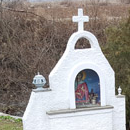

[Modified Image] ROI를 좌측 상단(0:130, 0:130)에 복사


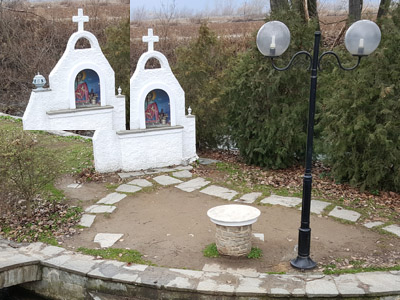

In [5]:
# ROI 추출 예시: (y: 20~150, x: 70~200)
image_copy3 = image.copy()

# 안전하게 min() 함수를 사용하여 이미지 범위 내에서만 추출
roi = image_copy3[20:min(150, image_copy3.shape[0]), 70:min(200, image_copy3.shape[1])]

# 잘라낸 ROI 확인
print("[ROI] 20:150, 70:200 영역")
cv2_imshow(roi)

# ROI를 다른 위치(0:130, 0:130)에 복사
h_roi, w_roi = roi.shape[:2]
end_y = min(h_roi, image_copy3.shape[0])
end_x = min(w_roi, image_copy3.shape[1])
image_copy3[0:end_y, 0:end_x] = roi

print("[Modified Image] ROI를 좌측 상단(0:130, 0:130)에 복사")
cv2_imshow(image_copy3)

## 5. 픽셀별로 색상 다루기
OpenCV 이미지(3채널)는 **BGR** 순서로 채널을 저장합니다. 특정 채널만 확인하거나, 특정 채널을 제거할 수도 있습니다.

### 주요 기능
- `image[:, :, 0]`: Blue 채널
- `image[:, :, 1]`: Green 채널
- `image[:, :, 2]`: Red 채널

예를 들어, **Blue 채널만 따로 확인**하거나, **Red 채널을 제거**하여 이미지를 확인할 수 있습니다.

[Blue Channel]


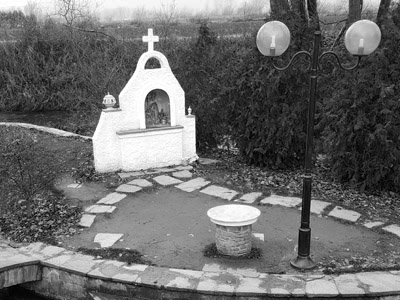

[Red 채널 제거]


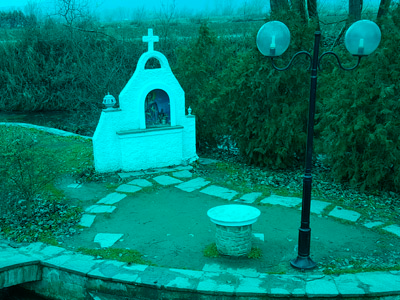

In [6]:
# (1) Blue 채널만 확인
blue_channel = image[:, :, 0]
print("[Blue Channel]")
cv2_imshow(blue_channel)

# (2) 특정 색상 채널 제거 (예: Red 채널을 0으로)
image_no_red = image.copy()
image_no_red[:, :, 2] = 0  # Red 채널 제거
print("[Red 채널 제거]")
cv2_imshow(image_no_red)

# 6. 추가 실습 (과제)
아래 과제들을 통해 이미지 조작에 대한 이해를 더 깊게 해보세요.

1. **영역 반전**
   - 슬라이싱을 이용해 **상단 100×100 영역**의 색상을 반전(`255 - pixel`)해보세요.
   - 예: `image[0:100, 0:100] = 255 - image[0:100, 0:100]`

2. **영역 복사 응용**
   - ROI로 추출한 영역을 **오른쪽 하단**에 붙여넣기.
   - 원본 이미지 크기를 확인하여 적절히 붙여넣는 좌표를 계산하세요.

3. **채널 교환**
   - BGR → RGB 순서로 채널을 바꾼 이미지를 만들어보세요. (배열 슬라이싱 또는 `cv2.cvtColor` 활용)
   - `RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)`도 가능합니다.

4. **이미지 합성** (난이도 ↑)
   - 이미지 두 장을 업로드한 뒤, 특정 영역을 잘라 다른 이미지에 합성해보세요.
   - 두 이미지의 크기가 다른 경우, 크기 조정(`cv2.resize`) 후 합성할 수도 있습니다.

## 6.1 과제 결과 코드 예시
각 과제를 간단하게나마 해결하는 코드를 예시로 제공합니다. 원하는 이미지에 맞춰 인덱스를 조정하시고, 다양한 실험을 해보세요.

[과제 1] 상단 100x100 영역 색상 반전


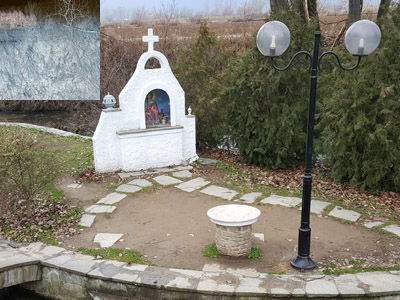

[과제 2] ROI를 오른쪽 하단에 붙이기


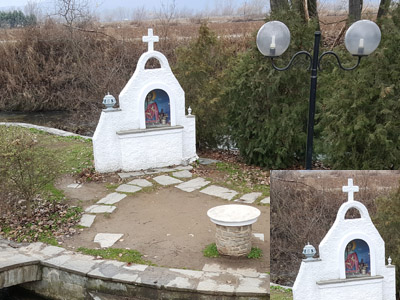

[과제 3] BGR → RGB 채널 교환


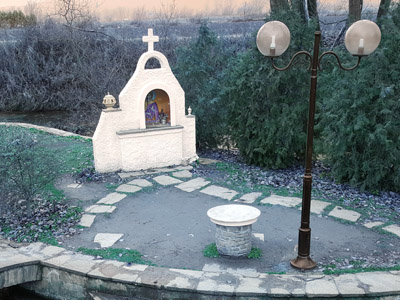

[과제 4] 이미지 합성 (예시)
이미지 2장을 업로드하세요.


Saving mine2.jpg to mine2 (1).jpg
Saving read_16.tif to read_16.tif
img1 shape: (300, 400, 3)
img2 shape: (300, 400, 3)
[img1 + ROI(img2)] 합성 결과


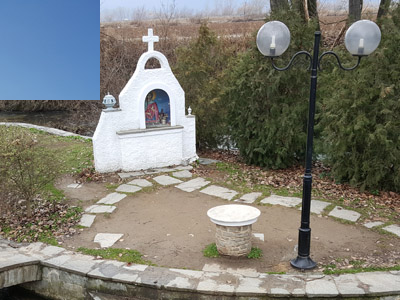

In [7]:
########################################
# (1) 영역 반전
########################################
image_assign_1 = image.copy()

# 상단 100×100 범위가 이미지보다 클 수 있으므로 안전 처리
rows_ = min(100, image_assign_1.shape[0])
cols_ = min(100, image_assign_1.shape[1])

# 영역 반전
image_assign_1[0:rows_, 0:cols_] = 255 - image_assign_1[0:rows_, 0:cols_]

print("[과제 1] 상단 100x100 영역 색상 반전")
cv2_imshow(image_assign_1)

########################################
# (2) 영역 복사 응용 (ROI 오른쪽 하단에 붙이기)
########################################
image_assign_2 = image.copy()

# ROI 설정 (예: y: 20~150, x: 70~200)
roi2 = image_assign_2[20:min(150, image_assign_2.shape[0]), 70:min(200, image_assign_2.shape[1])]
roi_h, roi_w = roi2.shape[:2]

# 붙여넣을 위치: (오른쪽 하단) -> y: (height - roi_h) ~ height, x: (width - roi_w) ~ width
H, W = image_assign_2.shape[:2]
start_y = max(0, H - roi_h)
start_x = max(0, W - roi_w)

image_assign_2[start_y:start_y+roi_h, start_x:start_x+roi_w] = roi2

print("[과제 2] ROI를 오른쪽 하단에 붙이기")
cv2_imshow(image_assign_2)

########################################
# (3) 채널 교환 (BGR → RGB)
########################################
image_assign_3 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print("[과제 3] BGR → RGB 채널 교환")
cv2_imshow(image_assign_3)

########################################
# (4) 이미지 합성
#  - Colab에 이미지를 2개 업로드한 뒤, 하나를 ROI로 잘라 다른 이미지에 붙이는 예시
########################################
print("[과제 4] 이미지 합성 (예시)")

# 이미지 2장 업로드
print("이미지 2장을 업로드하세요.")
uploaded_2 = files.upload()

if len(uploaded_2.keys()) < 2:
    print("두 장 모두 업로드되지 않았습니다. 합성 예시를 진행하지 않습니다.")
else:
    file_list = list(uploaded_2.keys())
    img1 = cv2.imread(file_list[0])
    img2 = cv2.imread(file_list[1])

    # 안전하게 크기 정보를 확인
    H1, W1 = img1.shape[:2]
    H2, W2 = img2.shape[:2]
    print("img1 shape:", img1.shape)
    print("img2 shape:", img2.shape)

    # 예시: img2에서 작은 ROI를 잘라 img1의 왼쪽 상단에 합성
    # ROI 범위: y: 0~100, x: 0~100 (img2 기준)
    h_roi = min(100, H2)
    w_roi = min(100, W2)
    roi_img2 = img2[0:h_roi, 0:w_roi]

    # img1에 붙여넣기(왼쪽 상단)
    img1_copy = img1.copy()
    img1_copy[0:h_roi, 0:w_roi] = roi_img2

    print("[img1 + ROI(img2)] 합성 결과")
    cv2_imshow(img1_copy)

    # 필요시, 크기 조정(cv2.resize) 후 합성도 가능
    # ex) roi_img2_resized = cv2.resize(roi_img2, (50, 50))


## 7. 참고 자료
- [OpenCV 공식 문서](https://docs.opencv.org/4.x/)  
  - OpenCV의 최신 버전(4.x) 문서. Python 코드 예제, 함수별 설명이 잘 정리되어 있습니다.
- [LearnOpenCV](https://learnopencv.com/)  
  - OpenCV 및 딥러닝 관련 유용한 튜토리얼이 많은 사이트입니다.

위에서 사용된 주요 함수들과 추가 사용법, 고급 활용 예시 등은 **공식 문서**와 **LearnOpenCV** 사이트에서 더 자세히 확인하실 수 있습니다.